In [1]:
import os
import pathlib

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skluc.main.utils import logger


pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)

flatten = lambda l: [item for sublist in l for item in sublist]

2018-09-26 11:27:10,752 [25326] DEBUG    matplotlib.backends: backend module://ipykernel.pylab.backend_inline version unknown


In [2]:
FILENAME = "gathered_results.csv"
DIRNAME = "/home/luc/Resultats/Deepstrom/september_2018/few_shot_tests_proto_withW"
DIRNAME_NO_BACKTRAIN = "/home/luc/Resultats/Deepstrom/september_2018/few_shot_tests_proto_nobacktrain"
filepath = os.path.join(DIRNAME, FILENAME)
filepath_nobacktrain = os.path.join(DIRNAME_NO_BACKTRAIN, FILENAME)

In [3]:
df_root_w = pd.read_csv(filepath)
df_root_no_backtrain = pd.read_csv(filepath_nobacktrain)
df_root = pd.concat([df_root_w, df_root_no_backtrain])
df_root = df_root.dropna(how="all")
df_root['--nys-size'].replace('None', np.nan, inplace=True)
df_root['--out-dim'].replace('None', np.nan, inplace=True)
df_root = df_root.apply(pd.to_numeric, errors="ignore")
df_root.head()

accuracy_test  global_time  --chi-square-PD-kernel  --chi-square-kernel --classification-method   --cut-layer --distance  --dropout  --exp-chi-square-kernel --gamma  --laplacian-kernel  --linear-kernel --nb-class-val  --nb-neighbour --nb-stack  --non-linear                    --non-linearity  --num-class-ep-test  --num-class-ep-train  --num-episode-test  --num-episode-train  --num-epoch  --num-query-ex  --num-supp-ex  --nys-size  --out-dim  --quiet  --rbf-kernel  --real-nystrom  --seed  deepfriedconvnet  deepstrom  dense    kernel    network   none
0       0.820453   247.299267                   False                 True                   proto  activation_4         L1        1.0                    False    None               False            False           None             1.0       None         False  <function relu at 0x7f46e6d45bf8>                 20.0                  60.0              1000.0              10000.0        300.0            15.0            5.0        16.0       16.0    False         False           False     0.0             False       True  False  chi2_cpd  deepstrom  False
3       0.735160   300.369003                   False                False                   proto  activation_4         L1        1.0                    False    None               False             True           None             1.0       None         False  <function relu at 0x7fd23cf54bf8>                 20.0                  60.0              1000.0              10000.0        300.0            15.0            5.0        64.0       64.0    False         False           False     0.0             False       True  False    linear  deepstrom  False
5       0.945930   205.126353                   False                False                   proto  activation_4         L1        1.0                    False    None               False             True           None             1.0       None         False  <function relu at 0x7fde48ad4bf8>                 20.0                  60.0              1000.0              10000.0        300.0            15.0            5.0       512.0      128.0    False         False           False     0.0             False       True  False    linear  deepstrom  False
8       0.966687   331.632290                   False                 True                   proto  activation_4         L1        1.0                    False    None               False            False           None             1.0       None         False  <function relu at 0x7fd867514bf8>                 20.0                  60.0              1000.0              10000.0        300.0            15.0            5.0       512.0      512.0    False         False           False     0.0             False       True  False  chi2_cpd  deepstrom  False
9       0.965730   389.632134                   False                 True                   proto  activation_4         L1        1.0                    False    None               False            False           None             1.0       None         False  <function relu at 0x7f997da95bf8>                 20.0                  60.0              1000.0              10000.0        300.0            15.0            5.0       512.0      256.0    False         False           False     0.0             False       True  False  chi2_cpd  deepstrom  False

In [4]:
df = df_root.loc[:, ["accuracy_test", "global_time", "--classification-method", "--num-class-ep-test", "--num-class-ep-train", "--num-epoch", "--num-query-ex", "--num-supp-ex", "--nys-size", "--out-dim", "kernel", "network"]]
df.head()

accuracy_test  global_time --classification-method  --num-class-ep-test  --num-class-ep-train  --num-epoch  --num-query-ex  --num-supp-ex  --nys-size  --out-dim    kernel    network
0       0.820453   247.299267                   proto                 20.0                  60.0        300.0            15.0            5.0        16.0       16.0  chi2_cpd  deepstrom
3       0.735160   300.369003                   proto                 20.0                  60.0        300.0            15.0            5.0        64.0       64.0    linear  deepstrom
5       0.945930   205.126353                   proto                 20.0                  60.0        300.0            15.0            5.0       512.0      128.0    linear  deepstrom
8       0.966687   331.632290                   proto                 20.0                  60.0        300.0            15.0            5.0       512.0      512.0  chi2_cpd  deepstrom
9       0.965730   389.632134                   proto                 20.0                  60.0        300.0            15.0            5.0       512.0      256.0  chi2_cpd  deepstrom

In [5]:
df.sort_values(by="accuracy_test", ascending=False)

accuracy_test  global_time --classification-method  --num-class-ep-test  --num-class-ep-train  --num-epoch  --num-query-ex  --num-supp-ex  --nys-size  --out-dim    kernel    network
10       0.968603    71.714954                   proto                 20.0                  60.0        300.0            15.0            5.0         NaN        NaN      None       none
8        0.966687   331.632290                   proto                 20.0                  60.0        300.0            15.0            5.0       512.0      512.0  chi2_cpd  deepstrom
9        0.965730   389.632134                   proto                 20.0                  60.0        300.0            15.0            5.0       512.0      256.0  chi2_cpd  deepstrom
39       0.965277   546.407900                   proto                 20.0                  60.0        300.0            15.0            5.0       512.0       64.0  chi2_cpd  deepstrom
22       0.965273   276.236217                   proto                 20.0                  60.0        300.0            15.0            5.0       512.0      128.0  chi2_cpd  deepstrom
35       0.964243   272.878566                   proto                 20.0                  60.0        300.0            15.0            5.0       256.0      256.0  chi2_cpd  deepstrom
28       0.962297   309.274488                   proto                 20.0                  60.0        300.0            15.0            5.0       256.0      128.0  chi2_cpd  deepstrom
40       0.961210   239.608370                   proto                 20.0                  60.0        300.0            15.0            5.0       256.0       64.0  chi2_cpd  deepstrom
43       0.959770   537.600852                   proto                 20.0                  60.0        300.0            15.0            5.0       512.0       16.0  chi2_cpd  deepstrom
24       0.956533   310.810606                   proto                 20.0                  60.0        300.0            15.0            5.0       256.0       16.0  chi2_cpd  deepstrom
33       0.955567   244.693870                   proto                 20.0                  60.0        300.0            15.0            5.0       128.0      128.0  chi2_cpd  deepstrom
29       0.955460   206.140511                   proto                 20.0                  60.0        300.0            15.0            5.0       128.0       64.0  chi2_cpd  deepstrom
38       0.951157   207.626843                   proto                 20.0                  60.0        300.0            15.0            5.0       128.0       16.0  chi2_cpd  deepstrom
34       0.948013   317.023373                   proto                 20.0                  60.0        300.0            15.0            5.0       512.0       64.0    linear  deepstrom
23       0.947863   259.484962                   proto                 20.0                  60.0        300.0            15.0            5.0       512.0      512.0    linear  deepstrom
10       0.946247   257.031197                   proto                 20.0                  60.0        300.0            15.0            5.0       512.0      256.0    linear  deepstrom
5        0.945930   205.126353                   proto                 20.0                  60.0        300.0            15.0            5.0       512.0      128.0    linear  deepstrom
21       0.945247   319.153287                   proto                 20.0                  60.0        300.0            15.0            5.0        64.0       64.0  chi2_cpd  deepstrom
30       0.943773   312.411644                   proto                 20.0                  60.0        300.0            15.0            5.0        64.0       16.0  chi2_cpd  deepstrom
45       0.942927   320.475398                   proto                 20.0                  60.0        300.0            15.0            5.0       512.0       16.0    linear  deepstrom
44       0.932053   238.426246                   proto                 20.0                  60.0 

In [6]:
kernel_names = set(df["kernel"].values)
kernel_names.remove("None")
logger.debug("Kernel functions are: {}".format(kernel_names))

nystrom_sizes = set(df["--nys-size"])
logger.debug(f"Nystrom sizes: {nystrom_sizes}")

output_dims = set(df["--out-dim"])
logger.debug(f"Output dimension: {output_dims}")

networks = set(df["network"].values)
logger.debug(f"Network types are {networks}")

2018-09-26 11:27:10,992 [25326] DEBUG    root: Kernel functions are: {'linear', 'chi2_cpd'}
2018-09-26 11:27:10,995 [25326] DEBUG    root: Nystrom sizes: {512.0, 64.0, 128.0, 256.0, 1024.0, nan, 16.0}
2018-09-26 11:27:10,996 [25326] DEBUG    root: Output dimension: {512.0, 64.0, 128.0, 256.0, 0.0, nan, 16.0}
2018-09-26 11:27:10,997 [25326] DEBUG    root: Network types are {'none', 'deepstrom'}


chi2_cpd
linear
chi2_cpd
linear


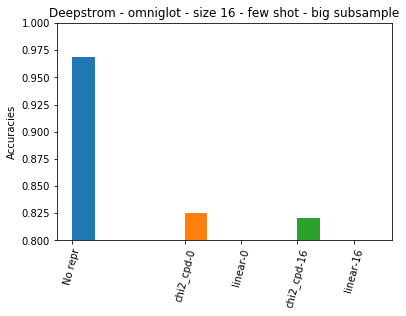

chi2_cpd
linear
chi2_cpd
linear
chi2_cpd
linear


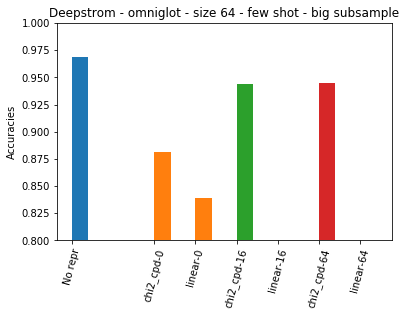

chi2_cpd
linear
chi2_cpd
linear
chi2_cpd
linear
chi2_cpd
linear


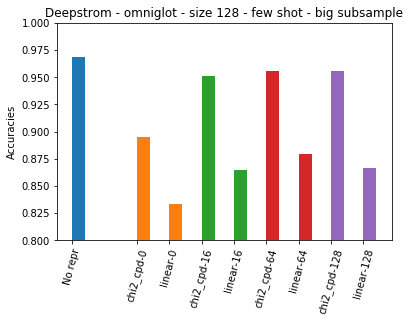

chi2_cpd
linear
chi2_cpd
linear
chi2_cpd
linear
chi2_cpd
linear
chi2_cpd
linear


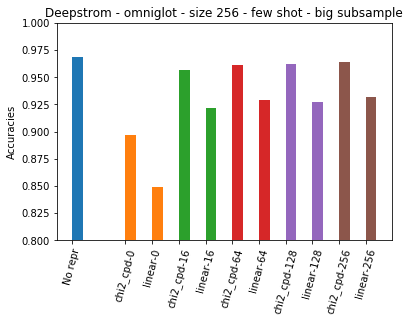

chi2_cpd
linear
chi2_cpd
linear
chi2_cpd
linear
chi2_cpd
linear
chi2_cpd
linear
chi2_cpd
linear


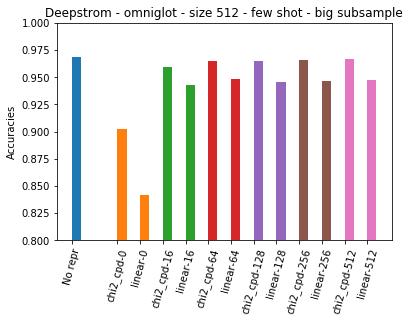

chi2_cpd
linear


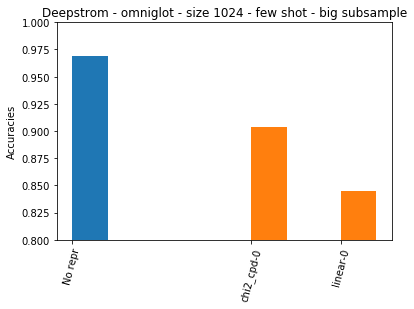

In [8]:
step_between_groups = 0.25
group_size = 1
step_inside_groups = 0.15
bar_width = 0.2
min_acc = 0.8
max_acc = 1.0
linewidth = 0.9

real_nys_marker = "s"

learned_nys_marker = "x"

dense_marker = "v"
dense_color = "r"

deepfried_marker = "8"
deepfried_color = "b"

d_translate_kernel = {
    "linear": "Linear",
    "chi2_cpd": "Chi2",
    "rbf": "Gaussian",
}


for idx_plot, n_size in enumerate(sorted(nystrom_sizes)):
    if np.isnan(n_size):
        continue
    fig, axs = plt.subplots()
    group_of_bins = []
    group_of_bins_labels = []
    
    
    df_none = df[df["network"] == "none"]
    group_of_bins.append([df_none["accuracy_test"].values[0]])
    group_of_bins_labels.append(["No repr"])
    
    df_deepstrom = df[df["network"] == "deepstrom"]
        
    df_n_size = df_deepstrom[df_deepstrom["--nys-size"] == n_size]

    for o_dim in sorted(output_dims):
        if np.isnan(o_dim):
            continue
        df_o_dim = df_n_size[df_n_size["--out-dim"] == o_dim]
        if len(df_o_dim) > 0:
            current_group_of_bins = []
            current_group_of_bins_labels = []
            for k_name in sorted(kernel_names):
                df_k_name = df_o_dim[df_o_dim["kernel"] == k_name]
                current_group_of_bins.append(df_k_name["accuracy_test"].values[0])
                current_group_of_bins_labels.append(f"{k_name}-{int(o_dim)}")

            group_of_bins.append(current_group_of_bins)
            group_of_bins_labels.append(current_group_of_bins_labels)
    
    x_locations_total = []
    x_labels_total = []
    for i, group in enumerate(group_of_bins):
        x_locations = np.linspace(start=i*(group_size) + step_between_groups, stop=(i+1)*(group_size) - step_between_groups, num=len(group))
        x_locations_total.extend(list(x_locations))
        x_labels_total.extend(list(group_of_bins_labels[i]))
        axs.bar(x_locations, 
                group,
                width=bar_width,
                align="edge")
    axs.set_ylim(min_acc, max_acc)        
    axs.set_ylabel('Accuracies')
    axs.set_title(f'Deepstrom - omniglot - size {int(n_size)} - few shot - big subsample')
#     base_out_dir = os.path.join(os.path.abspath(__file__.split(".")[0]), "images")
#     out_name = "acc_param_{}_{}_{}".format(k_name, wafter, multiview_method)

#     pathlib.Path(out_dir_cut_layer).mkdir(parents=True, exist_ok=True)
#     out_path = os.path.join(out_dir_cut_layer, out_name)
#     logger.debug(out_path)
#     f.savefig(out_path)

    plt.xticks(x_locations_total, x_labels_total, rotation=75)
    plt.show()
# plt.xticks(index + bar_width / 2)
# ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
# ax.legend()
# plt.bar(np.arange(4), np.random.rand(4))